In [2]:
import os 
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import json

In [3]:
## SELECT SESSION FOR VISUALIZATION
session = 0

In [4]:
f = open("./logs/medical_ssd_resnet50_pbr.log")
lines = f.readlines()
f.close()

In [5]:
temp_log_dicts=[]
for i,line in enumerate(lines):
    try:
        curr_dict = json.loads(line)
        temp_log_dicts.append(curr_dict)
    except:
        print(line + ' is on line: ' + str(i))

In [6]:
#check that log lines are inside
print(len(temp_log_dicts))

20011


In [7]:
#create pandas dataframes from log file
log_dicts = []
for i,log_dict in enumerate(temp_log_dicts):
    if log_dict['session'] == session:
        log_dicts.append(log_dict)


In [8]:
print(len(log_dicts))
print(log_dicts[1])

20011
{'type': 'train', 'session': 0, 'data': {'loss': {'B': 4.42907, 'M': 4.82475, 'C': 19.40822, 'S': 2.59203, 'T': 31.25407}, 'epoch': 0, 'iter': 0, 'lr': 0.0001, 'elapsed': 8.814141988754272}, 'time': 1702343462.688293}


In [9]:
# initialize dataframes and fill them, im sure theres a better way for this but whatever
# Loss Key:
        #  - B: Box Localization Loss
        #  - C: Class Confidence Loss
        #  - M: Mask Loss
        #  - P: Prototype Loss
        #  - D: Coefficient Diversity Loss
        #  - E: Class Existence Loss
        #  - S: Semantic Segmentation Loss
train_dict = {}
train_dict['epoch'] = []
train_dict['iter'] = []
train_dict['total_loss'] = []
train_dict['bbox_loss'] = []
train_dict['mask_loss'] = [] 
train_dict['time-elapsed'] = []
val_dict = {}
val_dict['epoch'] = []
val_dict['iter'] = []
val_dict['total_loss'] = []
val_dict['bbox_loss'] = []
val_dict['mask_loss'] = []
val_dict['time-elapsed'] = []

for log_dict in log_dicts:
    if log_dict['type'] in ["train"]:
        train_dict['epoch'].append(log_dict['data']['epoch'])
        train_dict['iter'].append(log_dict['data']['iter'])
        train_dict['total_loss'].append(log_dict['data']['loss']['T'])
        train_dict['bbox_loss'].append(log_dict['data']['loss']['B'])
        train_dict['mask_loss'].append(log_dict['data']['loss']['M'])
        train_dict['time-elapsed'].append(log_dict['data']['elapsed'])
    elif log_dict['type'] in ['val-loss']:
        val_dict['epoch'].append(log_dict['data']['epoch'])
        val_dict['iter'].append(log_dict['data']['iter'])
        val_dict['total_loss'].append(log_dict['data']['val_loss']['T'])
        val_dict['bbox_loss'].append(log_dict['data']['val_loss']['B'])
        val_dict['mask_loss'].append(log_dict['data']['val_loss']['M'])
        val_dict['time-elapsed'].append(log_dict['data']['elapsed'])

train_pd = pd.DataFrame.from_dict(train_dict)
val_pd = pd.DataFrame.from_dict(val_dict)
print(train_pd)

       epoch   iter  total_loss  bbox_loss  mask_loss  time-elapsed
0          0      0    31.25407    4.42907    4.82475      8.814142
1          0      1    26.41232    5.37929    4.78399      0.452637
2          0      2    24.44841    5.57617    5.79513      0.953519
3          0      3    21.26235    5.35614    4.31302      0.383833
4          0      4    20.57221    5.22918    4.77993      1.379518
...      ...    ...         ...        ...        ...           ...
19995      3  19995     3.74608    1.04818    0.65279      0.869375
19996      3  19996     5.40314    1.75583    0.77838      1.418843
19997      3  19997     5.04894    1.22332    0.82736      0.918538
19998      3  19998     5.32197    1.70968    1.37368      0.826159
19999      3  19999     4.03948    1.44512    0.64681      0.865942

[20000 rows x 6 columns]


In [10]:
print(val_pd)

   epoch   iter  total_loss  bbox_loss  mask_loss  time-elapsed
0      0   3000    6.636056   2.467216   1.524064    290.407968
1      1   6000    5.845816   2.035106   1.308763    212.865316
2      1   9000    5.523132   1.898375   1.192543    213.835721
3      2  12000    5.307712   1.729661   1.196990    207.335894
4      2  15000    5.127410   1.651977   1.160798    201.048767
5      3  18000    4.883794   1.516754   1.064399    204.202341


In [11]:
loss_array = train_pd['total_loss'].to_numpy()
iterations_array = train_pd['iter'].to_numpy()
print(len(loss_array))
print(len(iterations_array))
val_loss_array = val_pd['total_loss'].to_numpy()
val_iterations_array = val_pd['iter'].to_numpy()
print(len(val_loss_array))
print(len(val_iterations_array))


20000
20000
6
6


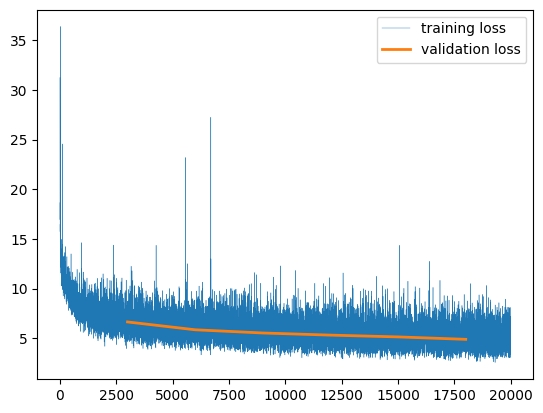

In [12]:

plt.plot(iterations_array, loss_array, linewidth=0.3, label='training loss')
plt.plot(val_iterations_array, val_loss_array, linewidth=2, label='validation loss')
plt.legend()
plt.show()

In [35]:
val_time = 0
train_time = 0
for time in val_dict['time-elapsed']:
    val_time += time

for time in train_dict['time-elapsed']:
    train_time += time

print('Training time: ' + str(round(train_time/60,2)) + ' min')
print('Validation time: ' + str(round(val_time/60,2)) + ' min')


Training time: 281.21 min
Validation time: 141.33 min
